ARI&CA

C:\Users\YUXIN\AppData\Local\Temp\ipykernel_21760\3032736502.py:32: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='Method', y='ACC', data=df_melt, palette=palette)


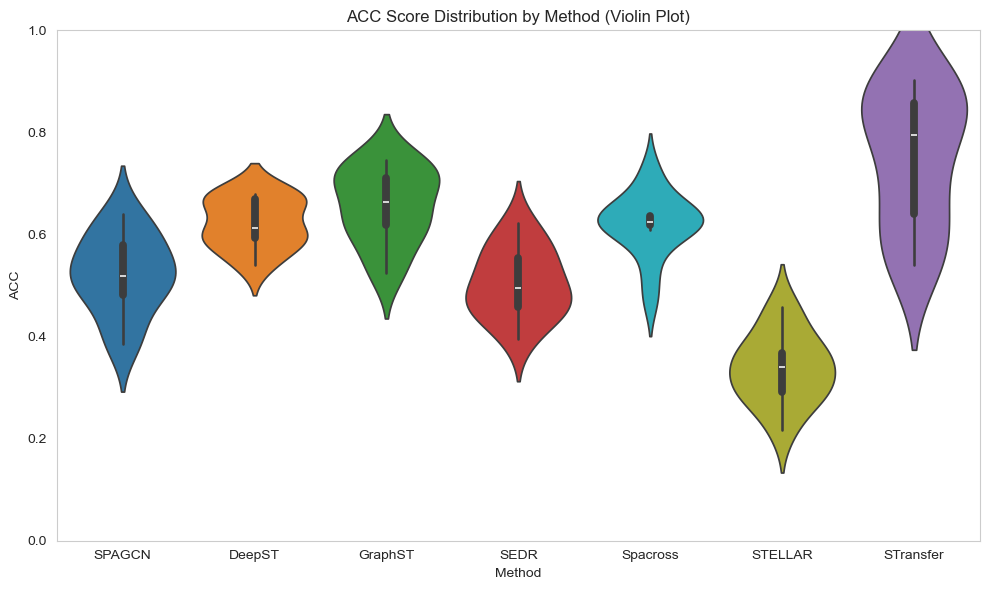

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

file_path = r"C:\Users\YUXIN\Desktop\STransfer\test\DLPFC\CA.csv"

col_names = ['SampleID', 'SPAGCN', 'DeepST', 'GraphST', 'SEDR',"Spacross", "STELLAR" ,'STransfer']
df = pd.read_csv(file_path, sep=',', names=col_names, header=0)

avg_row = df[df['SampleID'] == 'avg'].copy()
df = df[df['SampleID'] != 'avg']

methods = ['SPAGCN', 'DeepST', 'GraphST', 'SEDR',"Spacross","STELLAR" ,'STransfer']
for m in methods:
    df[m] = df[m].astype(float)
    avg_row[m] = avg_row[m].astype(float)

df['SampleID'] = df['SampleID'].astype(str)
df_melt = df.melt(id_vars=['SampleID'], value_vars=methods, var_name='Method', value_name='ACC')

# ✅ 统一颜色设置：自定义调色板
palette = {
    'SPAGCN': '#1f77b4',   
    'DeepST': '#ff7f0e',  
    'GraphST': '#2ca02c',  
    'SEDR': '#d62728',     
    "Spacross":'#17becf',
    "STELLAR":'#bcbd22',
    'STransfer': '#9467bd'  
}
plt.figure(figsize=(10,6))
sns.violinplot(x='Method', y='ACC', data=df_melt, palette=palette)
plt.title("CA Score Distribution by Method (Violin Plot)")
plt.ylim(0, 1)
plt.tight_layout()
plt.grid(False)
plt.show()


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

file_path = r"C:\Users\YUXIN\Desktop\STransfer\test\DLPFC\ARI.csv"

col_names = ['SampleID', 'SPAGCN', 'DeepST', 'GraphST', 'SEDR',"Spacross", "STELLAR" ,'STransfer']
df = pd.read_csv(file_path, sep=',', names=col_names, header=0)

avg_row = df[df['SampleID'] == 'avg'].copy()
df = df[df['SampleID'] != 'avg']

methods = ['SPAGCN', 'DeepST', 'GraphST', 'SEDR',"Spacross","STELLAR" ,'STransfer']
for m in methods:
    df[m] = df[m].astype(float)
    avg_row[m] = avg_row[m].astype(float)

df['SampleID'] = df['SampleID'].astype(str)
df_melt = df.melt(id_vars=['SampleID'], value_vars=methods, var_name='Method', value_name='ARI')


palette = {
    'SPAGCN': '#1f77b4',   
    'DeepST': '#ff7f0e',   
    'GraphST': '#2ca02c',  
    'SEDR': '#d62728',     
    "Spacross":'#17becf',
    "STELLAR":'#bcbd22',
    'STransfer': '#9467bd'   
}

plt.figure(figsize=(10,6))
sns.violinplot(x='Method', y='ARI', data=df_melt, palette=palette)
plt.title("ARI Score Distribution by Method (Violin Plot)")
plt.ylim(0, 1)
plt.tight_layout()
plt.grid(False)
plt.show()

trajectory inference

In [3]:
import warnings
import os
import matplotlib.lines as mlines
from STransfer.params import ParamConfig
from STransfer.utils import *
from STransfer.modules import *
from STransfer.train import *
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import matplotlib


warnings.filterwarnings('ignore')
random_seed = 2023
os.environ["CUDA_LAUNCH_BLOCKING"] = "1"
device = 'cuda:0' if torch.cuda.is_available() else 'cpu'
criterion_classify = nn.CrossEntropyLoss()
label_mapping = {'L1': 1, 'L2': 2, 'L3': 3, 'L4': 4, 'L5': 5, 'L6': 6, 'WM': 0}
data_dir = r"C:\Users\YUXIN\Desktop\new\new\data"
slicename_s = "151508"
slicename_t = "151507"

adata, data, labels, graph_dict = preprocess_slice_DLPFC(slicename_s, data_dir, device, label_mapping, 1000)
adata_t, data_t, labels_t, graph_dict_t = preprocess_slice_DLPFC(slicename_t, data_dir, device, label_mapping, 1000)

Index(['WM', 'Layer1', 'Layer2', 'Layer3', 'Layer4', 'Layer5', 'Layer6'], dtype='object')


[<Axes: xlabel='UMAP1', ylabel='UMAP2'>, <Axes: >]

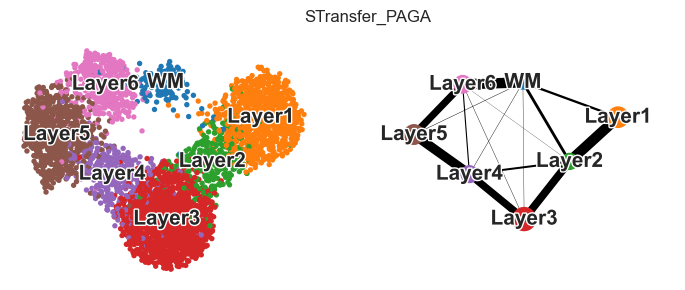

In [4]:
path = r"C:\Users\YUXIN\Desktop\151507\151507_target_latent.npy"
laten_z_t = np.load(path)
adata_t.X = adata_t.X.astype("float64")
latent_numpy = laten_z_t
pred_labels_t_path = r"C:\E\JSU\BIO\file\STransfer\STrafer\params\DLPFC5\STrafer\151508-151507\151507_target_pred_labels.csv"
pred_labels_t = pd.read_csv(pred_labels_t_path)
pred_labels_t = pred_labels_t['pred'].values

adata_t.obsm["X_latent"] = latent_numpy  
sc.pp.neighbors(adata_t, use_rep="X_latent", n_neighbors=12)
adata_t.obs['pred_labels_t'] = pred_labels_t
adata_t.obs['labels_t'] = labels_t.cpu().numpy()
adata_t.obs['pred_labels_t'] = adata_t.obs['pred_labels_t'].astype('category')
adata_t.obs['labels_t'] = adata_t.obs['labels_t'].astype('category')

adata_t.obs['pred_labels_t'] = pred_labels_t
adata_t.obs['labels_t'] = labels_t.cpu().numpy()

new_labels = [
    "WM",
    "Layer1",
    "Layer2",
    "Layer3",
    "Layer4",
    "Layer5",
    "Layer6"
]
adata_t.obsm['X_latent'] = laten_z_t
adata_t.obs['pred'] = pred_labels_t 
adata_t.obs['pred'] = adata_t.obs['pred'].astype('category')
adata_t.obs['pred'] = adata_t.obs['pred'].cat.rename_categories(new_labels)

print(adata_t.obs['pred'].cat.categories)

sc.pp.neighbors(adata_t,use_rep='X_latent',n_neighbors=15)

sc.tl.paga(adata_t,groups="pred")
sc.tl.umap(adata_t)
plt.rcParams["figure.figsize"] = (4, 3)

sc.pl.paga_compare(
    adata_t,
    legend_fontsize=15,
    frameon=False,
    size=60,
    title='STransfer_PAGA',
    legend_fontoutline=2,
    show=False)

confused metric

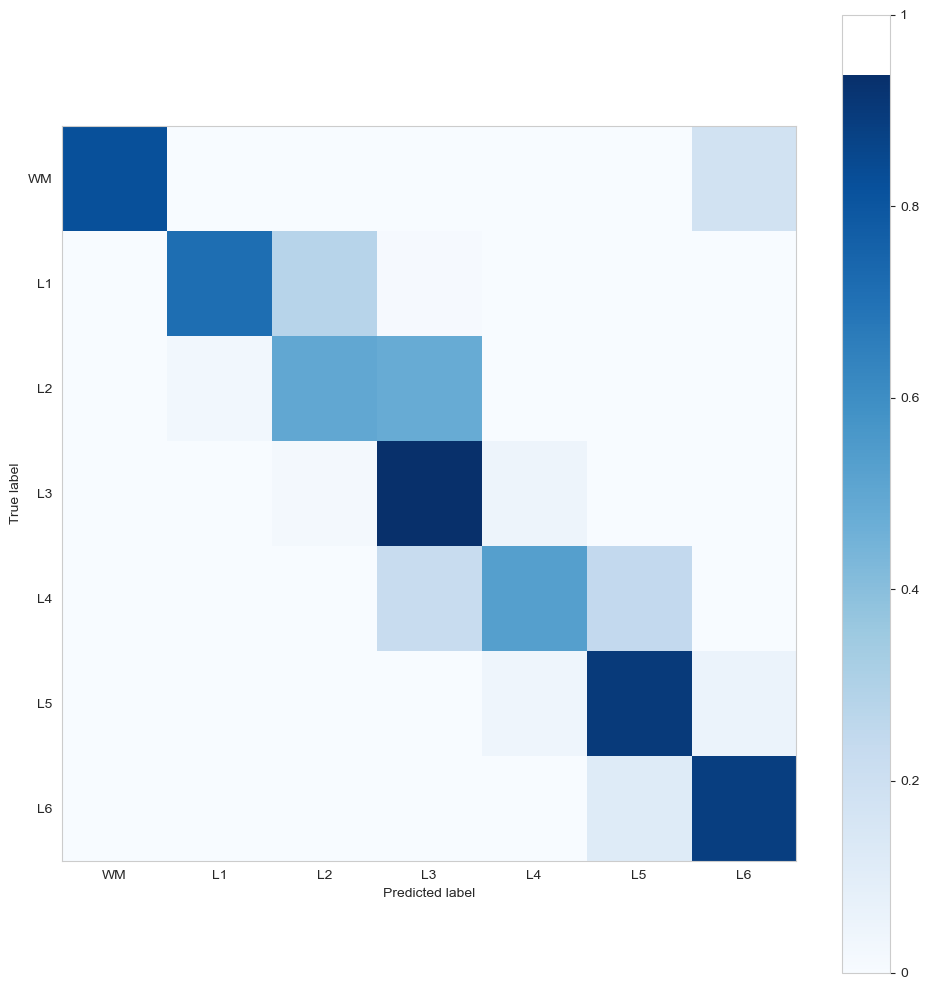

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import numpy as np


true_path = r"C:\Users\YUXIN\Desktop\STransfer\test\DLPFC\151674_label.csv"
pred_path = r"C:\Users\YUXIN\Desktop\STransfer\test\DLPFC\151674_target_pred_labels.csv"

true_df = pd.read_csv(true_path)
pred_df = pd.read_csv(pred_path)


y_true = true_df['pred'].values
y_pred = pred_df['pred'].values


labels = [0, 1, 2, 3, 4, 5, 6]
label_names = ['WM', 'L1', 'L2', 'L3', 'L4', 'L5', 'L6']
cm = confusion_matrix(y_true, y_pred, labels=labels)
cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

fig, ax = plt.subplots(figsize=(10, 10))
disp = ConfusionMatrixDisplay(confusion_matrix=cm_normalized, display_labels=label_names)
disp.plot(cmap='Blues', ax=ax, values_format='.2f')
ax.grid(False)

for txt in ax.texts:
    if txt.get_text() :
        txt.set_visible(False)
cbar = ax.images[0].colorbar
cbar.set_ticks(np.linspace(0, 1, 6)) 
cbar.set_ticklabels(['0', '0.2', '0.4', '0.6', '0.8', '1'])

# plt.title("Confusion Matrix: 151507(target)")
plt.tight_layout()
plt.show()